In [27]:
import wandb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
api = wandb.Api(timeout=600)
entity, project = 'autoconvnext', 'rainbow'
runs = api.runs(entity + '/' + project)

In [46]:
summary_list, config_list, name_list = [], [], []
network_archs = []
resolution = []
grad_clip = []
spectral_norm = []
history = []
run_ids = []
for run in runs:
    if run.config['resolution'] is None:
        continue
    summary_list.append(run.summary._json_dict)
    config_list.append({k: v for k,v in run.config.items() if not k.startswith('_')})
    network_archs.append(run.config['network_arch'])
    resolution.append(run.config['resolution'][0])
    grad_clip.append(run.config['max_grad_norm'])
    spectral_norm.append(run.config['spectral_norm'])
    name_list.append(run.name)
    run_ids.append(run.id)

In [135]:
cmap = sns.color_palette("husl", 15)

In [47]:
runs_df = pd.DataFrame({"summary":summary_list, "network_arch": network_archs, "resolution": resolution, 
                        "grad_clip": grad_clip, "spectral_norm":spectral_norm, "name": name_list, "run_id": run_ids})

convnext_atto
140
0.1
none
10.0
all
none
144
0.1
none
10.0
all
No history for run_id:  3lt66k8w exalted-sun-130
No history for run_id:  2ffu8kc3 radiant-silence-129
No history for run_id:  11gy0nsm comic-totem-131
No history for run_id:  om7zsusm clear-plasma-125
No history for run_id:  nxdb6rae toasty-firefly-123
No history for run_id:  2rpsghr2 hardy-dragon-123
No history for run_id:  2s4ahi0m misty-snowball-118
No history for run_id:  1o9smgda trim-thunder-117
No history for run_id:  1n19nt8a elated-bush-119
none
224
10.0
all
No history for run_id:  2woaclt4 neat-armadillo-128
No history for run_id:  3b118yal golden-grass-127
No history for run_id:  2t7xdjkp visionary-puddle-126
No history for run_id:  3r7q9ned faithful-durian-122
No history for run_id:  3ujyv8g6 vivid-silence-120
No history for run_id:  328j23im youthful-pond-120
No history for run_id:  24uvlfh8 drawn-cloud-116
No history for run_id:  3bkhuuum dark-night-114
No history for run_id:  2ux6yj3k proud-rain-114
No histor

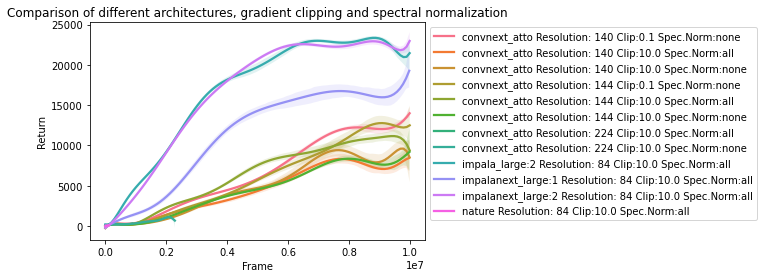

In [138]:
i = 0
for network_arch_name, arch_group_df in runs_df.groupby('network_arch'):
    print(network_arch_name)
    # print(arch_group_df[['resolution', 'grad_clip', 'spectral_norm', 'name']])
    for resolution_name, resolution_group_df in arch_group_df.groupby('resolution'):
        print(resolution_name)
        # print(resolution_group_df[['grad_clip', 'spectral_norm', 'name']])

        for grad_clip_name, grad_clip_group_df in resolution_group_df.groupby('grad_clip'):
            print(grad_clip_name)
            # print(grad_clip_group_df[['spectral_norm', 'name']])

            for spectral_norm_name, spectral_norm_group_df in grad_clip_group_df.groupby('spectral_norm'):
                print(spectral_norm_name)
                # print(spectral_norm_group_df[['name']])
                
                history_frames = []
                history_running_avg_reward = []
                for run_id in spectral_norm_group_df['run_id']:

                    run = api.run(entity + '/' + project + '/' + run_id)
                    history = run.history()
                    try: 
                        history_frames += history['x/game_frame'].to_list()
                        history_running_avg_reward += history['running_avg_return'].to_list()
                    except:
                        print("No history for run_id: ", run_id, run.name)
                        continue
                # print(history_frames)
                # print(history_running_avg_reward)
                sns.regplot(x=history_frames, y=history_running_avg_reward, order=10, ci=99, scatter=False,
                             label=f'{network_arch_name} Resolution: {resolution_name} Clip:{grad_clip_name} Spec.Norm:{spectral_norm_name}',
                             color=cmap[i])
                i += 1
                # sns.lineplot(x=history_frames, y=history_running_avg_reward)
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.xlabel('Frame')
plt.ylabel('Return')
plt.title('Comparison of different architectures, gradient clipping and spectral normalization')
plt.savefig('comp1.png', bbox_inches='tight')
plt.savefig('comp1.pdf', bbox_inches='tight')
plt.show()

In [133]:
sns.color_palette("husl", 15)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9542900080364486, 0.4779505175890752, 0.1963917622115608),
 (0.7930046244373694, 0.5708100522446624, 0.19489531984381053),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5571803870240879, 0.6507747739933957, 0.19331667588333168),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20774052347943134, 0.6813852191365138, 0.6002900398972028),
 (0.21316806282417172, 0.6731234926210208, 0.6838056741516414),
 (0.21979956608283252, 0.6625157876850336, 0.7732093159317208),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.5830408541921136, 0.5695319215803094, 0.9583591966369759),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.959647907830888, 0.3748291312853892, 0.893004453766301),
 (0.9642903119819891, 0.41420146582831974, 0.7188681186026104)]

In [134]:
sns.color_palette("hls", 15)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5791999999999999, 0.33999999999999997),
 (0.86, 0.7872, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.5167999999999999, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.86, 0.7872000000000001),
 (0.33999999999999997, 0.7247999999999999, 0.86),
 (0.33999999999999997, 0.5167999999999999, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.5791999999999999, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.7247999999999996),
 (0.86, 0.33999999999999997, 0.5167999999999995)]